## Model Interpretation - Exploring the Bias Variance Trade-off

### Objective:

Exploring the bias-variance trade-off.......

* **Part A: Overfitting in Linear Regression** .....

* **Part B: Overfitting in Decision Tree** .....

### A. Fitting a Linear Regression Line (Example)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#[REFER TO MY PREVIOUS NOTEBOOK]

In [3]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Here You Go ...

**A.1. Create a basic setup**

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

#### A.2. Fitting a Polynomial of degree 2

Use your polynomial_dataframe() function to create a dataframe with feature = 'sqft_living' and degree = 2. Take your y as 'price' and X as polynomial_dataframe(sales['sqft_living'], 1) and fit the regression model y on X. Plot the model on the scatter plot between 'sqft_living' and 'price'.

In [5]:
df = df.sort_values(['sqft_living','price'])

In [6]:
poly1_data = polynomial_dataframe(df['sqft_living'], 1)
poly1_data['price'] = df['price']

In [7]:
from sklearn import linear_model

In [8]:
# Linear Regression Model
model1 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model1.fit(poly1_data.drop('price',1), poly1_data['price'])

LinearRegression(n_jobs=1)

In [9]:
print("Intercept : ", model1.intercept_)
coeffs = pd.DataFrame(list(zip(poly1_data.drop('price',1).columns,model1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  -43580.74309447431


,features,estimated coefficients
0,power_1,280.623568


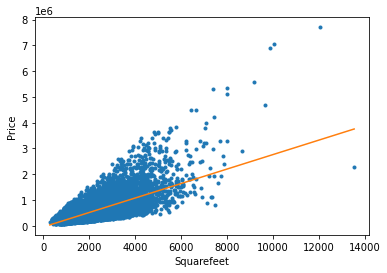

In [10]:
# Scatter plot of data (1st power of sqft)
plt.plot(poly1_data[['power_1']], poly1_data[['price']],'.',
         poly1_data[['power_1']], model1.predict(poly1_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### A.3. Fitting higher order polynomial fits

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect?

#### Polynomial of Degree 3

In [11]:
poly3_data = polynomial_dataframe(df['sqft_living'], 3)
poly3_data['price'] = df['price']
model3 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model3.fit(poly3_data.drop('price',1), poly3_data['price'])

LinearRegression(n_jobs=1)

In [12]:
print("Intercept : ", model3.intercept_)
coeffs = pd.DataFrame(list(zip(poly3_data.drop('price',1).columns,model3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  336819.7482212147


,features,estimated coefficients
0,power_1,-90.181986
1,power_2,0.087047
2,power_3,-0.000004


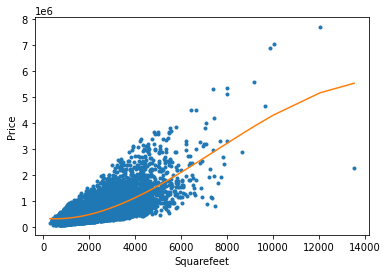

In [13]:
# Scatter plot of data (3rd power of sqft)
plt.plot(poly3_data[['power_1']], poly3_data[['price']],'.',
         poly3_data[['power_1']], model3.predict(poly3_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Polynomial of 4th Degree.

In [14]:
poly4_data = polynomial_dataframe(df['sqft_living'], 4)
poly4_data['price'] = df['price']
model4 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model4.fit(poly4_data.drop('price',1), poly4_data['price'])

LinearRegression(n_jobs=1)

In [15]:
print("Intercept : ", model4.intercept_)
coeffs = pd.DataFrame(list(zip(poly4_data.drop('price',1).columns,model4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  197702.35603857896


,features,estimated coefficients
0,power_1,1.142475e+02
1,power_2,-4.579812e-03
2,power_3,1.090136e-05
3,power_4,-7.050403e-10


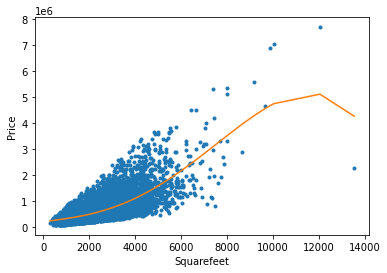

In [16]:
# Scatter plot of data (4th power of sqft)
plt.plot(poly4_data[['power_1']], poly4_data[['price']],'.',
         poly4_data[['power_1']], model4.predict(poly4_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### Polynomail of 5th Degree

In [17]:
poly5_data = polynomial_dataframe(df['sqft_living'], 5)
poly5_data['price'] = df['price']
model5 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model5.fit(poly5_data.drop('price',1), poly5_data['price'])

LinearRegression(n_jobs=1)

In [18]:
print("Intercept : ", model5.intercept_)
coeffs = pd.DataFrame(list(zip(poly5_data.drop('price',1).columns,model5.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  241004.4473818458


,features,estimated coefficients
0,power_1,4.646886e-05
1,power_2,8.415476e-02
2,power_3,-1.578941e-05
3,power_4,2.487198e-09
4,power_5,-1.243259e-13


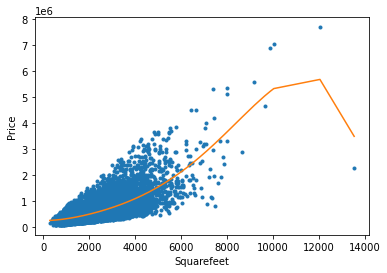

In [19]:
# Scatter plot of data (3rd power of sqft)
plt.plot(poly5_data[['power_1']], poly5_data[['price']],'.',
         poly5_data[['power_1']], model5.predict(poly5_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### A.4. Fit a polynomial of degree 15

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [20]:
poly15_data = polynomial_dataframe(df['sqft_living'], 15)
poly15_data['price'] = df['price']
model15 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model15.fit(poly15_data.drop('price',1), poly15_data['price'])

LinearRegression(n_jobs=1)

In [21]:
print("Intercept : ", model15.intercept_)
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model15.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Intercept :  537116.3296377126


,features,estimated coefficients
0,power_1,4.564042e-91
1,power_2,6.917121e-51
2,power_3,2.577328e-56
3,power_4,2.781979e-88
4,power_5,1.198639e-74
5,power_6,2.685755e-71
6,power_7,2.261476e-67
7,power_8,1.859003e-63
8,power_9,1.471441e-59
9,power_10,1.097710e-55


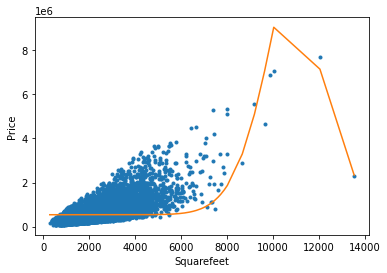

In [22]:
# Scatter plot of data (15th power of sqft)
plt.plot(poly15_data[['power_1']], poly15_data[['price']],'.',
         poly15_data[['power_1']], model15.predict(poly15_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

#### A.5. Exploring overfitting due to high variance

Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

#### Sets of our data

In [23]:
set1 = pd.read_csv("wk3_kc_house_set_1_data.csv")
set2 = pd.read_csv("wk3_kc_house_set_2_data.csv")
set3 = pd.read_csv("wk3_kc_house_set_3_data.csv")
set4 = pd.read_csv("wk3_kc_house_set_4_data.csv")

### Set1

In [24]:
set1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5400,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
5401,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
5402,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [25]:
poly_set1 = polynomial_dataframe(set1['sqft_living'], 15)
poly_set1['price'] = set1['price']
model_set1 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set1.fit(poly_set1.drop('price',1), poly_set1['price'])

LinearRegression(n_jobs=1)

In [26]:
print("Intercept: ", model_set1.intercept_)

Intercept:  539058.8186682225


In [27]:
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,3.057942e-90
1,power_2,-1.693949e-49
2,power_3,2.359091e-55
3,power_4,1.218881e-88
4,power_5,3.230827e-74
5,power_6,1.103583e-70
6,power_7,8.377240e-67
7,power_8,6.234120e-63
8,power_9,4.491564e-59
9,power_10,3.069388e-55


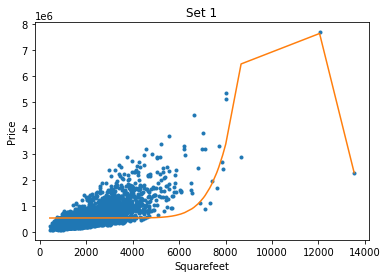

In [28]:
# Scatter plot of set1 data
plt.plot(poly_set1[['power_1']], poly_set1[['price']],'.',
         poly_set1[['power_1']], model_set1.predict(poly_set1.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 1')
plt.show()

### Set 2

In [29]:
set2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
1,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636
2,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
3,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
4,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
5394,6065300370,20150506T000000,4208000.0,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
5395,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
5396,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,...,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292


In [30]:
poly_set2 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set2['price'] = set2['price']
model_set2 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set2.fit(poly_set2.drop('price',1), poly_set2['price'])

LinearRegression(n_jobs=1)

In [31]:
print("Intercept: ", model_set2.intercept_)

Intercept:  506844.90426127776


In [32]:
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.713359e-77
1,power_2,7.335424e-39
2,power_3,-1.850525e-44
3,power_4,1.390005e-49
4,power_5,5.737862e-71
5,power_6,1.519350e-58
6,power_7,3.645496e-55
7,power_8,1.504163e-51
8,power_9,5.760157e-48
9,power_10,1.957705e-44


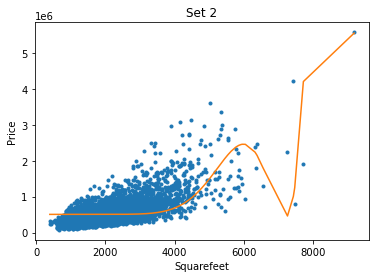

In [33]:
# Scatter plot of set 2 data
plt.plot(poly_set2[['power_1']], poly_set2[['price']],'.',
         poly_set2[['power_1']], model_set2.predict(poly_set2.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 2')
plt.show()

### Set 3

In [34]:
set3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9266700190,20150511T000000,245000.0,1,1.00,390,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
1,745000005,20140825T000000,145000.0,1,0.75,480,9750,1.0,0,0,...,4,480,0,1948,0,98146,47.4982,-122.362,1550,9924
2,7849202585,20140904T000000,170000.0,1,1.00,480,4560,1.0,0,0,...,5,480,0,1922,0,98065,47.5253,-121.826,890,4803
3,2420069251,20150225T000000,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4,3702900165,20141104T000000,295000.0,1,1.00,520,5600,1.0,0,0,...,6,520,0,1918,0,98116,47.5579,-122.395,1030,5265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,...,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593
5405,3303850390,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
5406,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
5407,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [35]:
poly_set3 = polynomial_dataframe(set3['sqft_living'], 15)
poly_set3['price'] = set3['price']
model_set3 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set3.fit(poly_set3.drop('price',1), poly_set3['price'])

LinearRegression(n_jobs=1)

In [36]:
print("Intercept: ", model_set3.intercept_)

Intercept:  530874.3166532961


In [37]:
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.837519e-88
1,power_2,-7.802241e-49
2,power_3,4.717023e-55
3,power_4,3.225079e-85
4,power_5,1.571702e-72
5,power_6,4.278949e-69
6,power_7,2.680096e-65
7,power_8,1.639114e-61
8,power_9,9.664350e-58
9,power_10,5.380447e-54


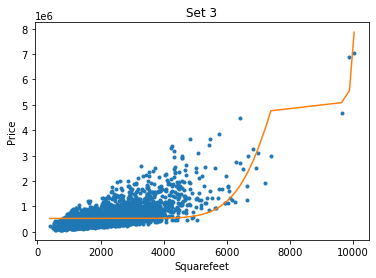

In [38]:
# Scatter plot of set 3 data
plt.plot(poly_set3[['power_1']], poly_set3[['price']],'.',
         poly_set3[['power_1']], model_set3.predict(poly_set3.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 3')
plt.show()

### Set 4

In [39]:
set4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
1,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
2,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
3,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4,8655900162,20150219T000000,156000.0,1,0.75,470,15000,1.0,0,0,...,4,470,0,1947,0,98014,47.6554,-121.908,1730,22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,...,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803
5398,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
5399,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,...,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587
5400,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619


In [40]:
poly_set4 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set4['price'] = set4['price']
model_set4 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set4.fit(poly_set4.drop('price',1), poly_set4['price'])

LinearRegression(n_jobs=1)

In [41]:
print("Intercept: ", model_set4.intercept_)

Intercept:  500934.6396598815


In [42]:
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,2.813243e-77
1,power_2,7.605454e-39
2,power_3,-1.918647e-44
3,power_4,1.441173e-49
4,power_5,5.701137e-71
5,power_6,1.575280e-58
6,power_7,3.779694e-55
7,power_8,1.559534e-51
8,power_9,5.972198e-48
9,power_10,2.029772e-44


**Answer the following questions**

**Is the sign (positive or negative) for power_15 the same in all four models?**

No

**True/False the plotted fitted lines look the same in all four plots**

False.

#### A.6. Validate your models

A separate training set, validation set and test set is provided to you. For each degree (1,2,...15), fit a regression model on the training set and validate on the validation set by computing the RSS. Save the RSS in a list and plot a graph to visualize 'RSS' against 'Model Complexity'. 

In [43]:
train_data = pd.read_csv("wk3_kc_house_train_data.csv")
valid_data = pd.read_csv("wk3_kc_house_valid_data.csv")

In [45]:
degree_rss_table =[]

for degree in range(1,16):
    data = polynomial_dataframe(train_data['sqft_living'], degree)
    data['price'] = train_data['price']
    model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    model.fit(data.drop('price',1), data['price'])
    validation_data = polynomial_dataframe(valid_data['sqft_living'], degree)
    val_pred = model.predict(validation_data)
    residuals = val_pred - valid_data['price']
    RSS = (residuals**2).sum()
    
    print('Degree: %d / RSS: %.4g' % (degree, RSS))
    degree_rss_table.append((degree,RSS))

Degree: 1 / RSS: 6.291e+14
Degree: 2 / RSS: 6.24e+14
Degree: 3 / RSS: 6.258e+14
Degree: 4 / RSS: 6.3e+14
Degree: 5 / RSS: 6.282e+14
Degree: 6 / RSS: 5.663e+14
Degree: 7 / RSS: 1.074e+15
Degree: 8 / RSS: 7.088e+15
Degree: 9 / RSS: 4.53e+16
Degree: 10 / RSS: 2.476e+17
Degree: 11 / RSS: 1.194e+18
Degree: 12 / RSS: 5.102e+18
Degree: 13 / RSS: 7.616e+17
Degree: 14 / RSS: 2.298e+18
Degree: 15 / RSS: 6.955e+18


In [46]:
# Choosing the best model
sorted(degree_rss_table, key = lambda RSS: RSS[1])

[(6, 566268592700025.0),
 (2, 623955062706518.1),
 (3, 625820280251530.8),
 (5, 628238442032656.4),
 (1, 629097886299585.8),
 (4, 629987335647053.1),
 (7, 1073845513449868.8),
 (8, 7087929059350247.0),
 (9, 4.5303237647781784e+16),
 (10, 2.475505467749561e+17),
 (13, 7.616230021273821e+17),
 (11, 1.1941675110991795e+18),
 (14, 2.2975609251117233e+18),
 (12, 5.102288792337993e+18),
 (15, 6.955038097256575e+18)]

In [48]:
lr_depth = pd.DataFrame(degree_rss_table,columns=["Depth","RSS"])
lr_depth

,Depth,RSS
0,1,6.290979e+14
1,2,6.239551e+14
2,3,6.258203e+14
3,4,6.299873e+14
4,5,6.282384e+14
5,6,5.662686e+14
6,7,1.073846e+15
7,8,7.087929e+15
8,9,4.530324e+16
9,10,2.475505e+17


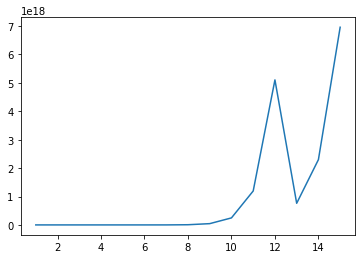

In [49]:
plt.plot(lr_depth['Depth'],lr_depth['RSS'])

**Answer the following questions**

**Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

#### Answer - Degree 6

#### A.7. Test your Final Model

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [50]:
test_data = pd.read_csv("wk3_kc_house_test_data.csv")

In [51]:
test_data = test_data.sort_values(['sqft_living','price'])

In [52]:
testing_data = polynomial_dataframe(test_data['sqft_living'],6)
testing_data['price'] = test_data['price']
testing_data

,power_1,power_2,power_3,power_4,power_5,power_6,price
1462,420,176400,74088000,31116960000,13069123200000,5489031744000000,280000.0
1172,550,302500,166375000,91506250000,50328437500000,27680640625000000,188000.0
29,560,313600,175616000,98344960000,55073177600000,30840979456000000,299000.0
793,600,360000,216000000,129600000000,77760000000000,46656000000000000,174000.0
1254,620,384400,238328000,147763360000,91613283200000,56800235584000000,244900.0
...,...,...,...,...,...,...,...
55,6050,36602500,221445125000,1339743006250000,8105445187812500000,49037943386265625000000,930000.0
1103,6085,37027225,225310664125,1371015391200625,8342628655455803125,50764895368448562015625,1610000.0
1341,6380,40704400,259694072000,1656848179360000,10570691384316800000,67441011031941184000000,1822500.0
2157,7120,50694400,360944128000,2569922191360000,18297846002483200000,130280663537680384000000,900000.0


In [53]:
train_data = train_data.sort_values(['sqft_living','price'])

In [54]:
low_RSS_data = polynomial_dataframe(train_data['sqft_living'],6)
low_RSS_data['price'] = train_data['price']

In [55]:
model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.fit(low_RSS_data.drop('price',1), low_RSS_data['price'])

LinearRegression(n_jobs=1)

In [56]:
test_pred = model.predict(testing_data.drop('price',1))

In [57]:
residuals = test_pred - testing_data['price']

In [58]:
RSS = (residuals**2).sum()

In [59]:
print("Intercept: ", model.intercept_)

Intercept:  297506.7566773582


In [60]:
coeffs = pd.DataFrame(list(zip(low_RSS_data.drop('price',1).columns,model.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

,features,estimated coefficients
0,power_1,8.500633e-12
1,power_2,1.432643e-08
2,power_3,3.794127e-05
3,power_4,-9.897942e-09
4,power_5,1.060747e-12
5,power_6,-3.908743e-17


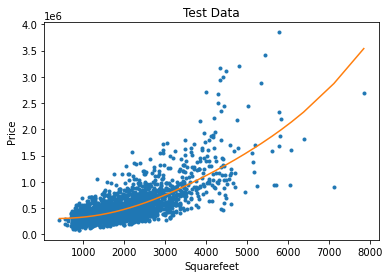

In [61]:
# Scatter plot of Test data
plt.plot(testing_data[['power_1']], testing_data[['price']],'.',
         testing_data[['power_1']],test_pred,'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Test Data')
plt.show()

**what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)**

In [62]:
print('RSS on Test data for the model of degree 6:',RSS)

RSS on Test data for the model of degree 6: 135225114619042.5


### B. Fitting a Regression Tree (Example)

In [63]:
df1 = pd.read_csv('wk3_kc_house_train_data.csv')
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


#### B.1. Fit a Decision Tree with 1 node

Consider the variables ["bedroom", "bathroom", "sqft_living", "floors", "grade"] as predictors and fit a decision tree model to predict the 'price'. Note that this is a model with low bias and high variance

In [64]:
predictors = df1[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
target = df1["price"]

In [65]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 42, max_depth = 10) 
model.fit(predictors,target)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [66]:
pred = model.predict(predictors)
residuals = pred - target

In [67]:
RSS = (residuals**2).sum()
RSS

331643489851451.8

#### B.2. Fitting deeper Trees

Consider the same variables and fit deeper and deeper decision trees on the training set and validate each trees on the validation set by coputing the RSS. Plot a graph to visualize the RSS against the Model Complexity

#### Train

In [68]:
model = DecisionTreeRegressor(random_state = 42) 
model.fit(predictors,target)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.tree import export_graphviz 
from sklearn import tree
import graphviz
  
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=["bedrooms", "bathrooms", "sqft_living", "floors", "grade"],  
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

#### Validation

In [69]:
predictors_val = valid_data[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
target_val = valid_data[["price"]]

#### Test Data

In [70]:
predictors_test = test_data[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
target_test = test_data[["price"]]

In [71]:
depth_rss_tree =[]

for depth in range(4,16):
    data = df1[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    data['price'] = df1['price']
    model = DecisionTreeRegressor(max_depth = depth,random_state=42)
    model.fit(data,data['price'])
    validation_data = valid_data[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    validation_data['price'] = valid_data['price']
    val_pred = model.predict(validation_data)
    residuals = val_pred - validation_data['price']
    RSS = (residuals**2).sum()
    
    print('Degree: %d / RSS: %.4g' % (depth, RSS))
    depth_rss_tree.append((depth,RSS))

<ipython-input-71-45124c4111f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = df1['price']
<ipython-input-71-45124c4111f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['price'] = valid_data['price']
<ipython-input-71-45124c4111f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Degree: 4 / RSS: 2.306e+13
Degree: 5 / RSS: 1.06e+13
Degree: 6 / RSS: 6.114e+12
Degree: 7 / RSS: 4.453e+11
Degree: 8 / RSS: 5.702e+12
Degree: 9 / RSS: 6.825e+12
Degree: 10 / RSS: 5.251e+12
Degree: 11 / RSS: 5.646e+12
Degree: 12 / RSS: 6.066e+12
Degree: 13 / RSS: 8.009e+12
Degree: 14 / RSS: 4.795e+12
Degree: 15 / RSS: 6.824e+12


<ipython-input-71-45124c4111f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['price'] = valid_data['price']
<ipython-input-71-45124c4111f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = df1['price']
<ipython-input-71-45124c4111f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [72]:
depth_rss_tree

[(4, 23062982557710.92),
 (5, 10604479344944.068),
 (6, 6114221054945.548),
 (7, 445282069567.7438),
 (8, 5702124282013.566),
 (9, 6825267881834.554),
 (10, 5251357579508.844),
 (11, 5645649705293.291),
 (12, 6066086394788.414),
 (13, 8008699532449.529),
 (14, 4795221443098.339),
 (15, 6823860543535.068)]

In [73]:
df_depth = pd.DataFrame(depth_rss_tree,columns=["Depth","RSS"])
df_depth

,Depth,RSS
0,4,2.306298e+13
1,5,1.060448e+13
2,6,6.114221e+12
3,7,4.452821e+11
4,8,5.702124e+12
5,9,6.825268e+12
6,10,5.251358e+12
7,11,5.645650e+12
8,12,6.066086e+12
9,13,8.008700e+12


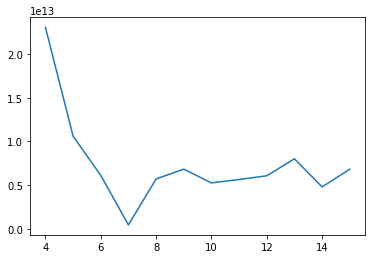

In [74]:
plt.plot(df_depth['Depth'],df_depth['RSS'])

For each of the trees fitted above calculate the training accuracy. Plot RSS(train) and RSS(validation) against model Complexity on the same graph to compare the two.

In [75]:
model_validation = DecisionTreeRegressor(random_state=42)
model_validation.fit(predictors_val,target_val)

DecisionTreeRegressor(random_state=42)

In [ ]:
val_data = tree.export_graphviz(model_validation, out_file=None, 
                                feature_names=["bedrooms", "bathrooms", "sqft_living", "floors", "grade"],  
                                filled=True)
graph = graphviz.Source(val_data, format="png") 
graph

#### B.3. Training Error Vs Validation Error

In [76]:
depth_rss_train =[]
depth_rss_valid =[]

for depth in range(4,16):
    data = df1[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    data['price'] = df1['price']
    model = DecisionTreeRegressor(max_depth = depth,random_state=42)
    
    model.fit(data,data['price'])
    train_pred = model.predict(data)
    residuals_t = train_pred - data['price']
    RSS_t = (residuals_t**2).sum()
    depth_rss_train.append((depth,RSS_t))
    
    validation_data = valid_data[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    validation_data['price'] = valid_data['price']
    val_pred = model.predict(validation_data)
    residuals = val_pred - validation_data['price']
    RSS = (residuals**2).sum()
    depth_rss_valid.append((depth,RSS))

<ipython-input-76-8355ac09024e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = df1['price']
<ipython-input-76-8355ac09024e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['price'] = valid_data['price']
<ipython-input-76-8355ac09024e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<ipython-input-76-8355ac09024e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['price'] = valid_data['price']


In [77]:
train_depth = pd.DataFrame(depth_rss_train,columns=["Depth","RSS"])
valid_depth = pd.DataFrame(depth_rss_valid,columns=["Depth","RSS"])

In [78]:
train_depth

,Depth,RSS
0,4,1.688795e+13
1,5,4.308722e+12
2,6,9.838262e+11
3,7,2.190828e+11
4,8,4.101408e+10
5,9,7.406463e+09
6,10,1.288737e+09
7,11,1.601028e+08
8,12,1.340615e+07
9,13,1.023738e+06


In [79]:
valid_depth

,Depth,RSS
0,4,2.306298e+13
1,5,1.060448e+13
2,6,6.114221e+12
3,7,4.452821e+11
4,8,5.702124e+12
5,9,6.825268e+12
6,10,5.251358e+12
7,11,5.645650e+12
8,12,6.066086e+12
9,13,8.008700e+12


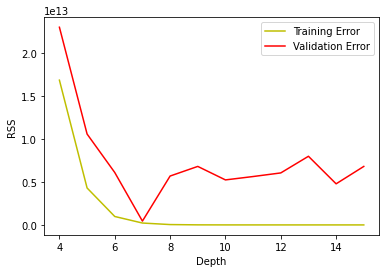

In [80]:
plt.plot(train_depth['Depth'],train_depth['RSS'],'y',label='Training Error')
plt.plot(valid_depth['Depth'],valid_depth['RSS'],'r',label='Validation Error')
plt.xlabel('Depth')
plt.ylabel('RSS')
plt.legend();

#### B.4. Further Experiments

For a fixed depth, include more and more variables and repeat step B.2. What would you expect to happen. Perform the experiment and validate your hypotheses.

In [82]:
predictors_final = df1[['bedrooms','bathrooms','sqft_living','floors','waterfront',
                   'sqft_basement','sqft_living15','grade','yr_renovated']]

In [83]:
target = df1['price']

In [84]:
model = DecisionTreeRegressor(random_state=42,max_depth=7)
model.fit(predictors_final,target)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [85]:
val_set = valid_data[['bedrooms','bathrooms','sqft_living','floors','waterfront',
                   'sqft_basement','sqft_living15','grade','yr_renovated']]
target_val = valid_data['price']

In [86]:
predicted = model.predict(val_set)

In [87]:
residuals = target_val - predicted
RSS = (residuals**2).sum()
print("RSS at Depth 7 :",RSS)

RSS at Depth 7 : 533965068256613.4


#### RSS at Depth 7 with 5 variables : 445282069567.7438
#### RSS at Depth 7 with 9 variables. : 533965068256613.4

In [88]:
445282069567.7438 < 533965068256613.4

True

#### It was expected that the RSS would decrease after using more variables but it was the other way around. 
#### This also might have happened because, the added variables were randomly chosen.